In [267]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy import stats
from matplotlib.ticker import FuncFormatter

## Load Clean and Merged File

In [268]:
plot_df=pd.read_csv("../merged_data/output/clean_data.csv")
plot_df = plot_df.drop(['Unnamed: 0'], axis=1)
plot_df

,Metropolitan Areas,GDP 2017,Unemployment Rate Jul 2017,Quarterly Income,Total Income,Avg Income,% Households with Internet,Pop Est Jul 2018,GDP Per Capita
0,"Abilene, TX",6749.0,3.3,4277.0,7.036152e+08,801.0,68.9,171451.0,0.039364
1,"Akron, OH",32386.0,4.6,17670.0,3.784546e+09,901.0,68.2,704845.0,0.045948
2,"Albuquerque, NM",38523.0,5.4,23200.0,4.308246e+09,876.0,77.1,915927.0,0.042059
3,"Amarillo, TX",12238.0,2.8,6857.0,1.304237e+09,873.0,75.4,265947.0,0.046017
4,"Ann Arbor, MI",20545.0,4.2,8361.0,3.128749e+09,1143.0,90.8,370963.0,0.055383
...,...,...,...,...,...,...,...,...,...
71,"Waco, TX",10676.0,3.7,5647.0,1.317859e+09,867.0,71.2,271942.0,0.039258
72,"Wichita Falls, TX",6483.0,3.5,3722.0,5.734454e+08,764.0,78.6,151306.0,0.042847
73,"Wichita, KS",29610.0,4.0,15611.0,3.230507e+09,857.0,73.4,644888.0,0.045915
74,"Wilmington, NC",12203.0,4.0,9550.0,1.390242e+09,844.0,81.4,294436.0,0.041445


## Scatter Plot and Linear Regression

### Verify Data Type to be able to Plot

In [269]:
plot_df.dtypes

Metropolitan Areas             object
GDP 2017                      float64
Unemployment Rate Jul 2017    float64
Quarterly Income              float64
Total Income                  float64
Avg Income                    float64
% Households with Internet    float64
Pop Est Jul 2018              float64
GDP Per Capita                float64
dtype: object

### Define a Function to Scatter Plot and Linear Regression

In [270]:
# Function to scatter plot and linear regression

def scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, eq_location):
    # Define the Location of the Linear Regression Equation
    if eq_location == 'UpperRight':
        loc_x = x_values.max() - (x_values.max()-x_values.min())/2
        loc_y = y_values.max() - (y_values.max()-y_values.min())/8
    elif eq_location == 'LowerRight':
        loc_x = x_values.max() - (x_values.max()-x_values.min())/2
        loc_y = y_values.min() 
    elif eq_location == 'UpperLeft':
        loc_x = x_values.min()
        loc_y = y_values.max() - (y_values.max()-y_values.min())/8
    elif eq_location == 'LowerLeft':
        loc_x = x_values.min()
        loc_y = y_values.min()
    elif eq_location == 'Middle':
        loc_x = (x_values.max()+ x_values.min())/2
        loc_y = (y_values.max()+ y_values.min())/2
    
    # Perform a linear regression 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    # print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create Plot

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"firebrick")

    # Label plot and annotate the line equation and r-squared
    plt.annotate( f'{line_eq} \n r-squared = {"%0.2f"% (rvalue*100)}%',(loc_x,  loc_y),
                 fontsize=15,color="firebrick")   
    
    
    chart_title_1 = chart_title.split('vs.')[0]
    chart_title_2 = chart_title.split('vs.')[1]
    
    plt.title(f'{chart_title_1} vs.\n {chart_title_2}' ,fontweight="bold");

    
    plt.xlabel(x_label ,fontweight="bold");
    plt.ylabel(y_label ,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    
    
    # Save Plot
    plt.savefig(file_name +'.png')
    
    # Print r square value
    print(f"The r-squared is: {rvalue}")
    if rvalue < 0:
        print(f'Because the r-squared is negative:{"%0.2f"% (rvalue*100)}%,')
        print(f'the model "{line_eq}" explains the data really poorly.')  
        print(f'The sum of the squared residuals of the regression are lower than')  
        print(f'the sum of the squared residuals of the mean.')
        print(f'In other words, a line built with the mean of "{y_label}",')
        print(f'respresents better the data than the regression model.') 
    else:
        if rvalue < 0.4:
            correlation = 'very low'
        elif rvalue > 0.7:
            correlation = 'strong'
        else:  
            correlation = 'modest'
        
        print(f'In the model {line_eq}: ')
        print(f'{"%0.2f"% (rvalue*100)}% of the variations in "{y_label}"')
        print(f'are explained by variations in "{x_label}".')
        print(f'"{y_label}" and "{x_label}" have a {correlation} correlation.')

    # Show plot
    plt.show()


In [271]:
plot_df.columns

Index(['Metropolitan Areas', 'GDP 2017', 'Unemployment Rate Jul 2017',
       'Quarterly Income', 'Total Income', 'Avg Income',
       '% Households with Internet', 'Pop Est Jul 2018', 'GDP Per Capita'],
      dtype='object')

### GDP (2017) vs. % Households with Internet (2013)

The r-squared is: 0.0006234692116768888
In the model y = 0.0x + 77.79: 
0.06% of the variations in "% Households with Internet"
are explained by variations in "GDP ($)".
"% Households with Internet" and "GDP ($)" have a very low correlation.


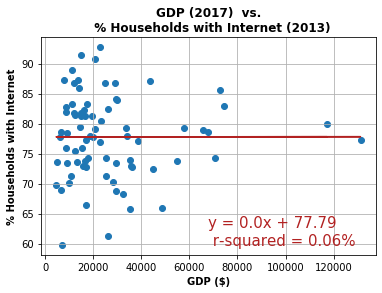

In [272]:
x_values = plot_df["GDP 2017"]
y_values = plot_df["% Households with Internet"]
chart_title = "GDP (2017) vs. % Households with Internet (2013)"
file_name = "output/" +"Fig.1 - " + chart_title
x_label = "GDP ($)"
y_label = "% Households with Internet"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'LowerRight')

### Unemployment Rate (2017) vs. % Households with Internet (2013)

The r-squared is: -0.3137774362335255
Because the r-squared is negative:-31.38%,
the model "y = -1.83x + 84.93" explains the data really poorly.
The sum of the squared residuals of the regression are lower than
the sum of the squared residuals of the mean.
In other words, a line built with the mean of "% Households with Internet",
respresents better the data than the regression model.


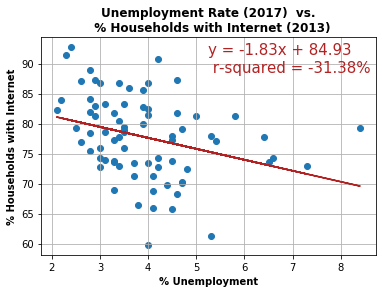

In [273]:
x_values = plot_df["Unemployment Rate Jul 2017"]
y_values = plot_df["% Households with Internet"]
chart_title = "Unemployment Rate (2017) vs. % Households with Internet (2013)"
file_name = "output/" +"Fig.2 - " + chart_title
x_label = "% Unemployment"
y_label = "% Households with Internet"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'UpperRight')

### Quarterly Income (3rd 2018) vs. % Households with Internet (2013)

The r-squared is: 0.026345236791468635
In the model y = 0.0x + 77.56: 
2.63% of the variations in "% Households with Internet"
are explained by variations in "Quarterly Income ($)".
"% Households with Internet" and "Quarterly Income ($)" have a very low correlation.


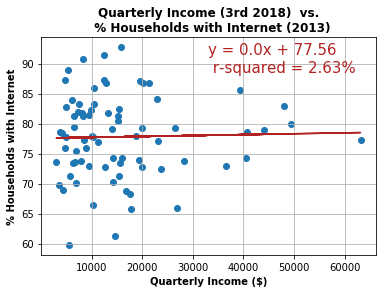

In [274]:
x_values = plot_df["Quarterly Income"]
y_values = plot_df["% Households with Internet"]
chart_title = "Quarterly Income (3rd 2018) vs. % Households with Internet (2013)"
file_name = "output/" +"Fig.3 - " + chart_title
x_label = "Quarterly Income ($)"
y_label = "% Households with Internet"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'UpperRight')

### Total Income (3rd 2018) vs. % Households with Internet (2013)

The r-squared is: 0.018593303170390322
In the model y = 0.0x + 77.65: 
1.86% of the variations in "% Households with Internet"
are explained by variations in "Total Income ($)".
"% Households with Internet" and "Total Income ($)" have a very low correlation.


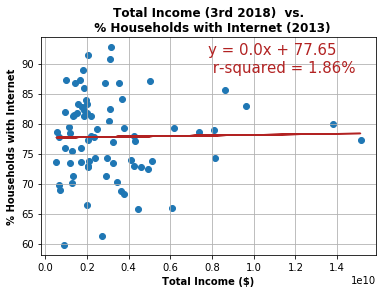

In [275]:
x_values = plot_df["Total Income"]
y_values = plot_df["% Households with Internet"]
chart_title = "Total Income (3rd 2018) vs. % Households with Internet (2013)"
file_name = "output/" +"Fig.4 - " + chart_title
x_label = "Total Income ($)"
y_label = "% Households with Internet"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'UpperRight')

### Avg Weekly Income (3rd 2018) vs. % Households with Internet (2013)

The r-squared is: 0.42749287923857676
In the model y = 0.02x + 55.43: 
42.75% of the variations in "% Households with Internet"
are explained by variations in "Average Weekly Income ($)".
"% Households with Internet" and "Average Weekly Income ($)" have a modest correlation.


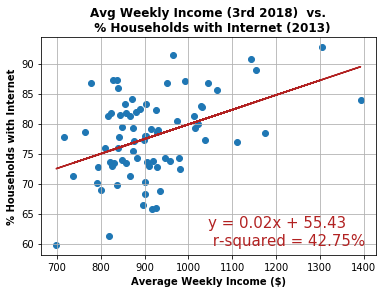

In [276]:
x_values = plot_df["Avg Income"]
y_values = plot_df["% Households with Internet"]
chart_title = "Avg Weekly Income (3rd 2018) vs. % Households with Internet (2013)"
file_name = "output/" +"Fig.5 - " + chart_title
x_label = "Average Weekly Income ($)"
y_label = "% Households with Internet"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'LowerRight')

### Population Estimate (July 2018) vs. % Households with Internet (2013)

The r-squared is: -0.07814907503725002
Because the r-squared is negative:-7.81%,
the model "y = -0.0x + 78.51" explains the data really poorly.
The sum of the squared residuals of the regression are lower than
the sum of the squared residuals of the mean.
In other words, a line built with the mean of "% Households with Internet",
respresents better the data than the regression model.


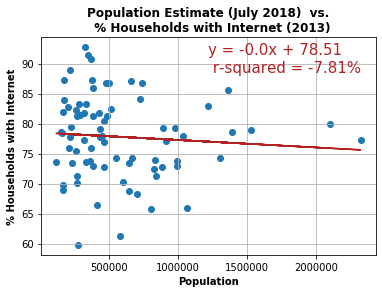

In [277]:
x_values = plot_df["Pop Est Jul 2018"]
y_values = plot_df["% Households with Internet"]
chart_title = "Population Estimate (July 2018) vs. % Households with Internet (2013)"
file_name = "output/" +"Fig.6 - " + chart_title
x_label = "Population"
y_label = "% Households with Internet"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'UpperRight')